In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
cap = cv2.VideoCapture("/opt/data/videos/OES-footage/ch0_2018.12.06_12.46.19.avi")

#while(True):
#    ret, frame = cap.read()
#    if frame.all() == None:
#        print("Empty Frame")
#        break
#    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#    cv2.imshow('frame',frame)
#    if cv2.waitKey(30) & 0xFF == ord('q'):
#        break
#        
#cap.release()    
#cv2.destroyAllWindows()    

438
700
219.0
350.0


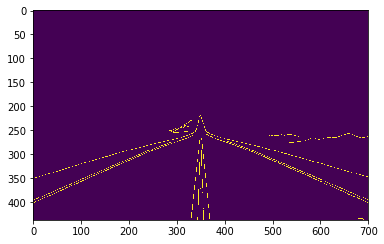

-1

In [2]:
#def make_coordinates(image,line_parameter):
#    slope, intercept = line_parameter
#    y1 = image.shape[0]
#    y2 = int(y1*(3/5))
#    x1 = int((y1 - intercept)/slope)
#    x2 = int((y2 - intercept)/slope)
#    return np.array([x1,y1,x2,y2])

#def average_slope_intercept(image,lines):
#    left_fit = []
#    right_fit = []
#    for line in lines:
#        x1,y1,x2,y2 = line.reshape(4)
#        parameters = np.polyfit((x1,x2), (y1,y2), 1)
#        slope = parameters[0]
#        intercept = parameters[1]
#        if slope < 0:
#            left_fit.append((slope,intercept))
#        else:
#            right_fit.append((slope,intercept))
#    left_fit_average = np.average(left_fit, axis=0)
#    right_fit_average = np.average(right_fit, axis=0)
#    left_line = make_coordinates(image,left_fit_average)
#    right_line = make_coordinates(image,right_fit_average)
#    return np.array([left_line, right_line])                 

def canny_transform(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def ROI(image):
    height = image.shape[0]
    width = image.shape[1]
    print(height)
    print(width)
    re_h = height/2
    re_w = width/2
    print(re_h)
    print(re_w)
    re_tm1 = width/3
    re_tm2 = width - re_tm1
    polygons = np.array([
    [(0, height), (width, height), (re_tm2,re_h),(re_tm1,re_h)]
    ])
    mask = np.zeros_like(image)
    
    cv2.fillPoly(mask, np.array([polygons], dtype=np.int32), 255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image
    
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1,y1),(x2,y2),(255,0,0),10)
    return line_image
            
image = cv2.imread(r"C:\Users\Asus\Documents\Anaconda\Self-Driving-Car\Road3.jpg")
lane_image = np.copy(image)

canny_image = canny_transform(lane_image)
cv2.imshow("Canny",canny_image)


cropped_image = ROI(canny_image)
lines = cv2.HoughLinesP(cropped_image,2, np.pi/180,100,np.array([]),minLineLength=20,maxLineGap=5)

#averaged_lines = average_slope_intercept(lane_image,lines)

line_image = display_lines(lane_image, lines)
cv2.imshow("Lines",line_image)


combo_image = cv2.addWeighted(lane_image, 0.8, line_image,1,1)
plt.imshow(canny_image)
plt.show()
cv2.imshow("Result",combo_image)
cv2.waitKey(0)